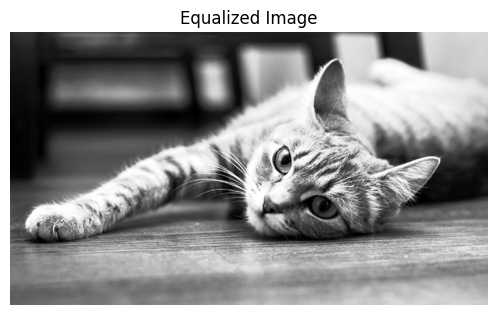

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def histogram_equalization(image):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        histogram[pixel] += 1

    cdf = np.zeros(256, dtype=float)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]
    new_intensity = (cdf * 255) // np.sum(histogram)
    equalized_image = new_intensity[image]

    return equalized_image

image = cv2.imread('/content/PEPE_WhatsNew_2_700x400.jpg', cv2.IMREAD_GRAYSCALE)

image_array = np.array(image)

equalized_image_array = histogram_equalization(image_array)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_array, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()
